In [1]:
import json
import pandas as pd
import C2Analyse
import C2Analyse as C2A
import matplotlib.pyplot as plt
import importlib
import re
import missingno as msno
import plotly.express as px
import numpy as np
from datetime import datetime
importlib.reload(C2A)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

pd.options.display.max_columns = None
reload_data = 0
verbose = 1
path_folder = "./output_2021-2019/"

clean = C2A.Clean(verbose=verbose)

def percent_complete(df):
    print(df.notnull().mean()*100)

In [2]:
if reload_data == 1:
    clean.load_JSON(path_folder=path_folder)

In [3]:
#reload from CSV (faster)
clean.load_csv(path_folder=path_folder)

if clean.verbose == 1:
    display(clean.df.athletes)
    display(clean.df.extended)
    display(clean.df.workouts)

/home/adam/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/adam/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


name availablity age         country        location  \
profile_id                                                                      
1157105        Benjamin Smith   available  32       Australia   Brisbane, QLD   
1120032            Jasper Liu   available  26   United States             NaN   
451524             Chris Gray   available  29   United States     Raleigh, NC   
1301914     Frederick Hancock   available  19  United Kingdom             NaN   
1189208           Itai Almogy   available  19   United States             NaN   
...                       ...         ...  ..             ...             ...   
1250363             John Oney   available  23   United States   Greenwich, OH   
737313            Alan Aikens   available  54   United States  Dorchester, MA   
1210804          George Watts   available  41   United States              UT   
1083487         Amir Mishriky   available  43           Egypt           Cairo   
1039194          HELIN GERARD   available  71          France  LA FERTE ALAIS   

                                     team      height  weight  logbook id  \
profile_id                                                                  
1157105                      Fusion Sport   6 ft 0 in  162 lb   1157105.0   
1120032                               NaN         NaN     NaN   1120032.0   
451524          Row House Raleigh Midtown   6 ft 4 in  190 lb    451524.0   
1301914         Forum Flyers (since 2001)   6 ft 2 in  163 lb   1301914.0   
1189208                               NaN         NaN     NaN   1189208.0   
...                                   ...         ...     ...         ...   
1250363                               NaN  5 ft 10 in  177 lb   1250363.0   
737313                Cambridge Boat Club         NaN  238 lb    737313.0   
1210804                               NaN   5 ft 7 in  178 lb   1210804.0   
1083487     Fitness Matters Indoor Rowing  5 ft 10 in  185 lb   1083487.0   
1039194                               NaN   6 ft 2 in  201 lb   1039194.0   

                  member since            retrieved  \
profile_id                                            
1157105     September 28, 2017  13-03-2021 12:24:37   
1120032      December 30, 2016  13-03-2021 12:24:37   
451524       November 22, 2007  13-03-2021 12:24:38   
1301914      December 04, 2019  13-03-2021 12:24:38   
1189208         March 08, 2018  13-03-2021 12:24:38   
...                        ...                  ...   
1250363      February 08, 2019  14-03-2021 14:03:20   
737313      September 28, 2008  14-03-2021 14:03:20   
1210804        August 18, 2018  14-03-2021 14:03:23   
1083487      February 21, 2016  14-03-2021 14:03:29   
1039194      February 22, 2015  14-03-2021 14:03:38   

                                            affiliation   wingspan  website  \
profile_id                                                                    
1157105                                             NaN        NaN      NaN   
1120032                                             NaN        NaN      NaN   
451524      University of North Carolina at Chapel Hill        NaN      NaN   
1301914                                    Forum Flyers  6 ft 5 in      NaN   
1189208                                             NaN        NaN      NaN   
...                                                 ...        ...      ...   
1250363                                             NaN        NaN      NaN   
737313                              Cambridge Boat Club        NaN      NaN   
1210804                                             NaN        NaN      NaN   
1083487                                 Fitness Matters        NaN      NaN   
1039194                                             NaN  6 ft 4 in      NaN   

            email adaptive rowing category adaptive skiing category  
profile_id                                                           
1157105       NaN                      NaN                      NaN  
1120032       N

age    gender weight class          country verified  \
workout_id                                                          
45106891    18.0     Male          Lwt     United States      Yes   
51182039    42.0     Male          Lwt     United States      Yes   
51157298    32.0     Male          Lwt         Australia      Yes   
50803540    24.0     Male          Lwt            France      Yes   
49949686    19.0     Male          Lwt    United Kingdom      Yes   
...          ...       ...          ...              ...      ...   
34619955    55.0   Female           NaN   United Kingdom       No   
34898628    52.0   Female           NaN           Norway       No   
35443299    22.0   Female           NaN    United States       No   
34790536    27.0   Female           NaN    United States      Yes   
35223315    36.0   Female           NaN          Belgium       No   

                     type      time distance     pace  \
workout_id                                              
45106891     Indoor Rower   1:00.0      379m   1:19.1   
51182039     Indoor Rower   1:00.0      366m   1:21.9   
51157298     Indoor Rower   1:00.0      397m   1:15.5   
50803540     Indoor Rower   1:00.0      366m   1:21.9   
49949686     Indoor Rower   1:00.0      389m   1:17.1   
...                   ...       ...      ...      ...   
34619955          BikeErg   8:22.0    4,000m   2:05.5   
34898628          BikeErg   8:23.8    4,000m   2:05.9   
35443299          BikeErg   8:24.9    4,000m   2:06.2   
34790536          BikeErg   8:25.6    4,000m   2:06.4   
35223315          BikeErg   8:34.3    4,000m   2:08.5   

                                    date           entered  \
workout_id                                                   
45106891                  June 13, 2020                Web   
51182039      February 02, 2021 18:15:00       ErgData iOS   
51157298      February 02, 2021 20:16:00   ErgData Android   
50803540       January 23, 2021 23:08:00   ErgData Android   
49949686       January 02, 2021 19:28:00       ErgData iOS   
...                                  ...               ...   
34619955     September 07, 2018 18:16:00       ErgData iOS   
34898628             September 30, 2018                Web   
35443299              November 15, 2018                Web   
34790536     September 22, 2018 13:09:00   ErgData Android   
35223315               October 28, 2018                Web   

                      retrieved race adaptive category  
workout_id                                              
45106891    13-03-2021 12:24:37  NaN               NaN  
51182039    13-03-2021 12:24:38  NaN               NaN  
51157298    13-03-2021 12:24:38  NaN               NaN  
50803540    13-03-2021 12:24:39  NaN               NaN  
49949686    13-03-2021 12:24:39  NaN               NaN  
...                         ...  ...               ...  
34619955    14-03-2021 14:03:42  NaN               NaN  
34898628    14-03-2021 14:03:42  NaN               NaN  
35443299    14-03-2021 14:03:42  NaN               NaN  
34790536    14-03-2021 14:03:42  NaN               NaN  
35223315    14-03-2021 14:03:43  NaN               NaN  

[331746 rows x 14 columns]

pos.               name  age           location country  \
workout_id                                                            
51157298       1     Benjamin Smith   32      Brisbane, QLD     AUS   
49949686       2  Frederick Hancock   19                NaN     GBR   
48271042       3         Jasper Liu   26                NaN     USA   
45106891       4        Itai Almogy   18                NaN     USA   
48223141       5         Chris Gray   29        Raleigh, NC     USA   
...          ...                ...  ...                ...     ...   
38060086      42      Steven Meador   63     Hershey 🇺🇸, PA     USA   
36865147       1      Kirsten Kline   30        Houston, TX     USA   
34894246       2        Katrin Jüch   42          Pattensen     GER   
33478889       3       Terry Laskey   64    Morrisville, VT     USA   
36343943       4           Fei Yuan   36  Fresh Meadows, NY     USA   

                                       club/affiliation  distance verified  \
workout_id                                                                   
51157298                                            NaN     397.0      Yes   
49949686                                   Forum Flyers     389.0      Yes   
48271042                                            NaN     386.0      Yes   
45106891                                            NaN     379.0      Yes   
48223141    University of North Carolina at Chapel Hill     372.0      Yes   
...                                                 ...       ...      ...   
38060086             Washington University in St. Louis       NaN      Yes   
36865147                         Engine by Carson (EBC)       NaN      Yes   
34894246                                 Mobility3sixty       NaN      Yes   
33478889                 Concept2, Inc, Morrisville, VT       NaN      Yes   
36343943                              CrossFit Flushing       NaN       No   

            year  machine   event            retrieved  profile_id  rower  \
workout_id                                                                  
51157298    2021    rower       1  13-03-2021 12:24:35   1157105.0  rower   
49949686    2021    rower       1  13-03-2021 12:24:35   1301914.0  rower   
48271042    2021    rower       1  13-03-2021 12:24:35   1120032.0  rower   
45106891    2021    rower       1  13-03-2021 12:24:35   1189208.0  rower   
48223141    2021    rower       1  13-03-2021 12:24:35    451524.0  rower   
...          ...      ...     ...                  ...         ...    ...   
38060086    2019  bikeerg  100000  14-03-2021 04:06:48   1060250.0    NaN   
36865147    2019  bikeerg  100000  14-03-2021 04:06:50   1223199.0    NaN   
34894246    2019  bikeerg  100000  14-03-2021 04:06:50   1189710.0    NaN   
33478889    2019  bikeerg  100000  14-03-2021 04:06:50      7270.0    NaN   
36343943    2019  bikeerg  100000  14-03-2021 04:06:50   1214385.0    NaN   

           weight gender adaptive category       time  
workout_id                                             
51157298        L      M      NaN      NaN        NaN  
49949686        L      M      NaN      NaN        NaN  
48271042        L      M      NaN      NaN        NaN  
45106891        L      M      NaN      NaN        NaN  
48223141        L      M      NaN      NaN        NaN  
...           ...    ...      ...      ...        ...  
38060086      NaN      M      NaN      NaN  4:26:36.6  
36865147      NaN      F      NaN      NaN  3:20:23.4  
34894246      NaN      F      NaN      NaN  4:11:31.8  
33478889      NaN      F      NaN      NaN  4:33:07.0  
36343943      NaN      F      NaN      NaN  4:44:30.4  

[331943 rows x 19 columns]

In [4]:
clean.df.athletes

name availablity age         country        location  \
profile_id                                                                      
1157105        Benjamin Smith   available  32       Australia   Brisbane, QLD   
1120032            Jasper Liu   available  26   United States             NaN   
451524             Chris Gray   available  29   United States     Raleigh, NC   
1301914     Frederick Hancock   available  19  United Kingdom             NaN   
1189208           Itai Almogy   available  19   United States             NaN   
...                       ...         ...  ..             ...             ...   
1250363             John Oney   available  23   United States   Greenwich, OH   
737313            Alan Aikens   available  54   United States  Dorchester, MA   
1210804          George Watts   available  41   United States              UT   
1083487         Amir Mishriky   available  43           Egypt           Cairo   
1039194          HELIN GERARD   available  71          France  LA FERTE ALAIS   

                                     team      height  weight  logbook id  \
profile_id                                                                  
1157105                      Fusion Sport   6 ft 0 in  162 lb   1157105.0   
1120032                               NaN         NaN     NaN   1120032.0   
451524          Row House Raleigh Midtown   6 ft 4 in  190 lb    451524.0   
1301914         Forum Flyers (since 2001)   6 ft 2 in  163 lb   1301914.0   
1189208                               NaN         NaN     NaN   1189208.0   
...                                   ...         ...     ...         ...   
1250363                               NaN  5 ft 10 in  177 lb   1250363.0   
737313                Cambridge Boat Club         NaN  238 lb    737313.0   
1210804                               NaN   5 ft 7 in  178 lb   1210804.0   
1083487     Fitness Matters Indoor Rowing  5 ft 10 in  185 lb   1083487.0   
1039194                               NaN   6 ft 2 in  201 lb   1039194.0   

                  member since            retrieved  \
profile_id                                            
1157105     September 28, 2017  13-03-2021 12:24:37   
1120032      December 30, 2016  13-03-2021 12:24:37   
451524       November 22, 2007  13-03-2021 12:24:38   
1301914      December 04, 2019  13-03-2021 12:24:38   
1189208         March 08, 2018  13-03-2021 12:24:38   
...                        ...                  ...   
1250363      February 08, 2019  14-03-2021 14:03:20   
737313      September 28, 2008  14-03-2021 14:03:20   
1210804        August 18, 2018  14-03-2021 14:03:23   
1083487      February 21, 2016  14-03-2021 14:03:29   
1039194      February 22, 2015  14-03-2021 14:03:38   

                                            affiliation   wingspan  website  \
profile_id                                                                    
1157105                                             NaN        NaN      NaN   
1120032                                             NaN        NaN      NaN   
451524      University of North Carolina at Chapel Hill        NaN      NaN   
1301914                                    Forum Flyers  6 ft 5 in      NaN   
1189208                                             NaN        NaN      NaN   
...                                                 ...        ...      ...   
1250363                                             NaN        NaN      NaN   
737313                              Cambridge Boat Club        NaN      NaN   
1210804                                             NaN        NaN      NaN   
1083487                                 Fitness Matters        NaN      NaN   
1039194                                             NaN  6 ft 4 in      NaN   

            email adaptive rowing category adaptive skiing category  
profile_id                                                           
1157105       NaN                      NaN                      NaN  
1120032       N

# Workouts

Sort and rename columns for easier working

In [5]:
#rename some columns
rename_columns = {"pos.":"pos", "category":"adaptive_cat", "weight":"weight_class"}
clean.df.workouts = clean.df.workouts.rename(columns=rename_columns)
clean.df.workouts = clean.df.workouts.reset_index()
#drop some columns
columns_to_drop = ["retrieved", "name", "club/affiliation", "country", "location", "verified"]
# wingspan dropped, not enough data to be useful
clean.df.workouts = clean.df.workouts.drop(columns_to_drop, axis=1)

#sort columns alphabetically
clean.df.workouts.sort_index(axis=1,inplace=True)


In [6]:
clean.df.workouts

adaptive adaptive_cat  age  distance   event gender  machine  pos  \
0           NaN          NaN   32     397.0       1      M    rower    1   
1           NaN          NaN   19     389.0       1      M    rower    2   
2           NaN          NaN   26     386.0       1      M    rower    3   
3           NaN          NaN   18     379.0       1      M    rower    4   
4           NaN          NaN   29     372.0       1      M    rower    5   
...         ...          ...  ...       ...     ...    ...      ...  ...   
331938      NaN          NaN   63       NaN  100000      M  bikeerg   42   
331939      NaN          NaN   30       NaN  100000      F  bikeerg    1   
331940      NaN          NaN   42       NaN  100000      F  bikeerg    2   
331941      NaN          NaN   64       NaN  100000      F  bikeerg    3   
331942      NaN          NaN   36       NaN  100000      F  bikeerg    4   

        profile_id  rower       time weight_class  workout_id  year  
0        1157105.0  rower        NaN            L    51157298  2021  
1        1301914.0  rower        NaN            L    49949686  2021  
2        1120032.0  rower        NaN            L    48271042  2021  
3        1189208.0  rower        NaN            L    45106891  2021  
4         451524.0  rower        NaN            L    48223141  2021  
...            ...    ...        ...          ...         ...   ...  
331938   1060250.0    NaN  4:26:36.6          NaN    38060086  2019  
331939   1223199.0    NaN  3:20:23.4          NaN    36865147  2019  
331940   1189710.0    NaN  4:11:31.8          NaN    34894246  2019  
331941      7270.0    NaN  4:33:07.0          NaN    33478889  2019  
331942   1214385.0    NaN  4:44:30.4          NaN    36343943  2019  

[331943 rows x 14 columns]

## Missing Data

### Time & Distance

Fixed distance events have no distance, fixed time events have no time, can fill this in from the event.

In [7]:
event_to_timedistance = {
    1:"1:00.0",
    4:"4:00.0",
    30:"30:00.0",
    60:"60:00.0",
    100:"100",
    200:"200",
    500:"500",
    1000:"1000",
    2000:"2000",
    4000:"4000",
    5000:"5000",
    6000:"6000",
    10000:"10000",
    20000:"20000",
    21097:"21097",
    40000:"40000",
    42195:"42195",
    100000:"100000"
}

clean.df.workouts.loc[clean.df.workouts["time"].isnull(), ["time"]] = clean.df.workouts[clean.df.workouts["time"].isnull()]["event"].replace(event_to_timedistance)
clean.df.workouts.loc[clean.df.workouts["distance"].isnull(), ["distance"]] = clean.df.workouts[clean.df.workouts["distance"].isnull()]["event"].replace(event_to_timedistance)

In [8]:
percent_complete(clean.df.workouts)

adaptive          0.791401
adaptive_cat      0.791401
age             100.000000
distance        100.000000
event           100.000000
gender          100.000000
machine         100.000000
pos             100.000000
profile_id       92.859919
rower            90.226334
time            100.000000
weight_class     90.226334
workout_id      100.000000
year            100.000000
dtype: float64


### Rower/Machine

Only need one of these columns, will keep machine.

If machine is "rower", replace with the value from "rower", otherwise leave alone.


In [9]:
clean.df.workouts.loc[clean.df.workouts["machine"]=="rower",["machine"]] = clean.df.workouts[clean.df.workouts["machine"]=="rower"]["rower"]
clean.df.workouts = clean.df.workouts.drop("rower", axis=1)

In [10]:
percent_complete(clean.df.workouts)

adaptive          0.791401
adaptive_cat      0.791401
age             100.000000
distance        100.000000
event           100.000000
gender          100.000000
machine         100.000000
pos             100.000000
profile_id       92.859919
time            100.000000
weight_class     90.226334
workout_id      100.000000
year            100.000000
dtype: float64


### Adaptive

Adaptive_cat contains more detail than adaptive, drop adaptive. Change nan to "able"

In [11]:
clean.df.workouts = clean.df.workouts.drop("adaptive", axis=1)
clean.df.workouts.loc[:, ["adaptive_cat"]] = clean.df.workouts["adaptive_cat"].replace({np.nan:"able"})

In [12]:
clean.df.workouts["adaptive_cat"].value_counts()

able         329316
PR3 (PD)        832
PR3             450
PR3 (VI)        265
PR3 (ID)        242
PR2             232
PR1             152
STAL             75
SIT3             65
PR3 (SA)         49
PR3 (AK)         48
SIT2             47
STA2             38
SIT1             35
STAN             26
FES              25
PR3 (GD)         20
VI               10
PR3 (AKD)         9
STA1              7
Name: adaptive_cat, dtype: int64

In [13]:
percent_complete(clean.df.workouts)

adaptive_cat    100.000000
age             100.000000
distance        100.000000
event           100.000000
gender          100.000000
machine         100.000000
pos             100.000000
profile_id       92.859919
time            100.000000
weight_class     90.226334
workout_id      100.000000
year            100.000000
dtype: float64


### Weight Class

Skierg and bikeerg have no weight classes, turn missing vals into H

In [14]:
clean.df.workouts.loc[:, ["weight_class"]] = clean.df.workouts["weight_class"].replace({np.nan:"H"})

In [15]:
percent_complete(clean.df.workouts)

adaptive_cat    100.000000
age             100.000000
distance        100.000000
event           100.000000
gender          100.000000
machine         100.000000
pos             100.000000
profile_id       92.859919
time            100.000000
weight_class    100.000000
workout_id      100.000000
year            100.000000
dtype: float64


In [16]:
percent_complete(clean.df.workouts)

adaptive_cat    100.000000
age             100.000000
distance        100.000000
event           100.000000
gender          100.000000
machine         100.000000
pos             100.000000
profile_id       92.859919
time            100.000000
weight_class    100.000000
workout_id      100.000000
year            100.000000
dtype: float64


In [17]:
percent_complete(clean.df.workouts)

adaptive_cat    100.000000
age             100.000000
distance        100.000000
event           100.000000
gender          100.000000
machine         100.000000
pos             100.000000
profile_id       92.859919
time            100.000000
weight_class    100.000000
workout_id      100.000000
year            100.000000
dtype: float64


### Profile ID

Without a profile ID, can't link to other workouts, drop these.

In [18]:
clean.df.workouts = clean.df.workouts[clean.df.workouts["profile_id"].notnull()]

In [19]:
percent_complete(clean.df.workouts)

adaptive_cat    100.0
age             100.0
distance        100.0
event           100.0
gender          100.0
machine         100.0
pos             100.0
profile_id      100.0
time            100.0
weight_class    100.0
workout_id      100.0
year            100.0
dtype: float64


In [20]:
clean.df.workouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308242 entries, 0 to 331942
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   adaptive_cat  308242 non-null  object 
 1   age           308242 non-null  int64  
 2   distance      308242 non-null  object 
 3   event         308242 non-null  int64  
 4   gender        308242 non-null  object 
 5   machine       308242 non-null  object 
 6   pos           308242 non-null  int64  
 7   profile_id    308242 non-null  float64
 8   time          308242 non-null  object 
 9   weight_class  308242 non-null  object 
 10  workout_id    308242 non-null  int64  
 11  year          308242 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 30.6+ MB


### Workout Time to Seconds

In [21]:
clean.df.workouts[clean.df.workouts["event"] == 10000].sort_values(by="time") #sorted alphabetically

adaptive_cat  age distance  event gender  machine    pos  profile_id  \
218726         able   40    10000  10000      M    rower      2   1345697.0   
133209         able   52    10000  10000      M  bikeerg      1    867757.0   
133210         able   47    10000  10000      M  bikeerg      2   1198648.0   
133211         able   40    10000  10000      M  bikeerg      3   1178097.0   
133212         able   42    10000  10000      M  bikeerg      4   1055604.0   
...             ...  ...      ...    ...    ...      ...    ...         ...   
318158         able   52    10000  10000      M    rower   6110   1087325.0   
318159         able   44    10000  10000      M    rower   6111   1185879.0   
318160         able   31    10000  10000      M    rower   6112   1108294.0   
111571         able   30    10000  10000      M    rower  10838   1373497.0   
318190         able   66    10000  10000      F    rower      1   1058400.0   

             time weight_class  workout_id  year  
218726    15:02.0            H    43441969  2020  
133209    15:52.0            H    52443110  2021  
133210    15:56.0            H    49003168  2021  
133211    16:08.6            H    51500320  2021  
133212    16:09.5            H    51037402  2021  
...           ...          ...         ...   ...  
318158    59:58.7            H    37185774  2019  
318159    59:58.8            H    37360810  2019  
318160    59:59.7            H    33942477  2019  
111571  8:08:46.1            H    45636926  2021  
318190     9:33.0            H    37706191  2019  

[37078 rows x 12 columns]

In [22]:
clean.df.workouts["time"] = clean.df.workouts["time"].apply(C2A.duration_string_to_duration_seconds)

clean.df.workouts[clean.df.workouts["event"] == 10000].sort_values(by="time")

adaptive_cat  age distance  event gender  machine   pos  profile_id  \
218725         able   56    10000  10000      M    rower     1   1319416.0   
318190         able   66    10000  10000      F    rower     1   1058400.0   
218726         able   40    10000  10000      M    rower     2   1345697.0   
133209         able   52    10000  10000      M  bikeerg     1    867757.0   
133210         able   47    10000  10000      M  bikeerg     2   1198648.0   
...             ...  ...      ...    ...    ...      ...   ...         ...   
319025         able   34    10000  10000      F    rower   836   1241103.0   
113250         able   33    10000  10000      F    rower  1679   1419272.0   
318189         able   51    10000  10000      M    rower  6142   1190125.0   
311788         able   42    10000  10000      M    rower  1197   1221539.0   
311789         able   72    10000  10000      M    rower  1198    165307.0   

            time weight_class  workout_id  year  
218725     238.0            H    42017229  2020  
318190     573.0            H    37706191  2019  
218726     902.0            H    43441969  2020  
133209     952.0            H    52443110  2021  
133210     956.0            H    49003168  2021  
...          ...          ...         ...   ...  
319025  162480.0            H    36461737  2019  
113250  172140.0            H    48934849  2021  
318189  173168.0            H    36359070  2019  
311788  176221.0            L    35105482  2019  
311789  180000.0            L    36929582  2019  

[37078 rows x 12 columns]

### Data Types

In [23]:
datatypes = {
    "adaptive_cat":"category",
    "age":int,
    "distance":int,
    "event":int,
    "gender": "category",
    "machine":"category",
    "pos":int,
    "profile_id":int,
    "time":float,
    "weight_class":"category",
    "workout_id":int,
    "year":int
}
   
clean.df.workouts  = clean.df.workouts.astype(datatypes)

In [24]:
clean.df.workouts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308242 entries, 0 to 331942
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   adaptive_cat  308242 non-null  category
 1   age           308242 non-null  int64   
 2   distance      308242 non-null  int64   
 3   event         308242 non-null  int64   
 4   gender        308242 non-null  category
 5   machine       308242 non-null  category
 6   pos           308242 non-null  int64   
 7   profile_id    308242 non-null  int64   
 8   time          308242 non-null  float64 
 9   weight_class  308242 non-null  category
 10  workout_id    308242 non-null  int64   
 11  year          308242 non-null  int64   
dtypes: category(4), float64(1), int64(7)
memory usage: 22.3 MB


In [25]:
clean.df.workouts[clean.df.workouts["event"] == 10000].sort_values(by="time")

adaptive_cat  age  distance  event gender  machine   pos  profile_id  \
218725         able   56     10000  10000      M    rower     1     1319416   
318190         able   66     10000  10000      F    rower     1     1058400   
218726         able   40     10000  10000      M    rower     2     1345697   
133209         able   52     10000  10000      M  bikeerg     1      867757   
133210         able   47     10000  10000      M  bikeerg     2     1198648   
...             ...  ...       ...    ...    ...      ...   ...         ...   
319025         able   34     10000  10000      F    rower   836     1241103   
113250         able   33     10000  10000      F    rower  1679     1419272   
318189         able   51     10000  10000      M    rower  6142     1190125   
311788         able   42     10000  10000      M    rower  1197     1221539   
311789         able   72     10000  10000      M    rower  1198      165307   

            time weight_class  workout_id  year  
218725     238.0            H    42017229  2020  
318190     573.0            H    37706191  2019  
218726     902.0            H    43441969  2020  
133209     952.0            H    52443110  2021  
133210     956.0            H    49003168  2021  
...          ...          ...         ...   ...  
319025  162480.0            H    36461737  2019  
113250  172140.0            H    48934849  2021  
318189  173168.0            H    36359070  2019  
311788  176221.0            L    35105482  2019  
311789  180000.0            L    36929582  2019  

[37078 rows x 12 columns]

# Athletes

Sort and rename columns for easier working

In [26]:
#sort columns alphabetically
clean.df.athletes.sort_index(axis=1,inplace=True)
clean.df.athletes

adaptive rowing category adaptive skiing category  \
profile_id                                                     
1157105                         NaN                      NaN   
1120032                         NaN                      NaN   
451524                          NaN                      NaN   
1301914                         NaN                      NaN   
1189208                         NaN                      NaN   
...                             ...                      ...   
1250363                         NaN                      NaN   
737313                          NaN                      NaN   
1210804                         NaN                      NaN   
1083487                         NaN                      NaN   
1039194                         NaN                      NaN   

                                            affiliation age availablity  \
profile_id                                                                
1157105                                             NaN  32   available   
1120032                                             NaN  26   available   
451524      University of North Carolina at Chapel Hill  29   available   
1301914                                    Forum Flyers  19   available   
1189208                                             NaN  19   available   
...                                                 ...  ..         ...   
1250363                                             NaN  23   available   
737313                              Cambridge Boat Club  54   available   
1210804                                             NaN  41   available   
1083487                                 Fitness Matters  43   available   
1039194                                             NaN  71   available   

                   country  email      height        location  logbook id  \
profile_id                                                                  
1157105          Australia    NaN   6 ft 0 in   Brisbane, QLD   1157105.0   
1120032      United States    NaN         NaN             NaN   1120032.0   
451524       United States    NaN   6 ft 4 in     Raleigh, NC    451524.0   
1301914     United Kingdom    NaN   6 ft 2 in             NaN   1301914.0   
1189208      United States    NaN         NaN             NaN   1189208.0   
...                    ...    ...         ...             ...         ...   
1250363      United States    NaN  5 ft 10 in   Greenwich, OH   1250363.0   
737313       United States    NaN         NaN  Dorchester, MA    737313.0   
1210804      United States    NaN   5 ft 7 in              UT   1210804.0   
1083487              Egypt    NaN  5 ft 10 in           Cairo   1083487.0   
1039194             France    NaN   6 ft 2 in  LA FERTE ALAIS   1039194.0   

                  member since               name            retrieved  \
profile_id                                                               
1157105     September 28, 2017     Benjamin Smith  13-03-2021 12:24:37   
1120032      December 30, 2016         Jasper Liu  13-03-2021 12:24:37   
451524       November 22, 2007         Chris Gray  13-03-2021 12:24:38   
1301914      December 04, 2019  Frederick Hancock  13-03-2021 12:24:38   
1189208         March 08, 2018        Itai Almogy  13-03-2021 12:24:38   
...                        ...                ...                  ...   
1250363      February 08, 2019          John Oney  14-03-2021 14:03:20   
737313      September 28, 2008        Alan Aikens  14-03-2021 14:03:20   
1210804        August 18, 2018       George Watts  14-03-2021 14:03:23   
1083487      February 21, 2016      Amir Mishriky  14-03-2021 14:03:29   
1039194      February 22, 2015       HELIN GERARD  14-03-2021 14:03:38   

                                     team  website  weight   wingspan  
profile_id                                                             
1157105                      Fusion Sport      NaN  162 lb        NaN  
1120032              

In [27]:
clean.df.athletes = clean.df.athletes.reset_index()

#sort columns alphabetically
clean.df.athletes.sort_index(axis=1,inplace=True)

In [28]:
clean.df.athletes

adaptive rowing category adaptive skiing category  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                          NaN                      NaN   
...                        ...                      ...   
81022                      NaN                      NaN   
81023                      NaN                      NaN   
81024                      NaN                      NaN   
81025                      NaN                      NaN   
81026                      NaN                      NaN   

                                       affiliation age availablity  \
0                                              NaN  32   available   
1                                              NaN  26   available   
2      University of North Carolina at Chapel Hill  29   available   
3                                     Forum Flyers  19   available   
4                                              NaN  19   available   
...                                            ...  ..         ...   
81022                                          NaN  23   available   
81023                          Cambridge Boat Club  54   available   
81024                                          NaN  41   available   
81025                              Fitness Matters  43   available   
81026                                          NaN  71   available   

              country  email      height        location  logbook id  \
0           Australia    NaN   6 ft 0 in   Brisbane, QLD   1157105.0   
1       United States    NaN         NaN             NaN   1120032.0   
2       United States    NaN   6 ft 4 in     Raleigh, NC    451524.0   
3      United Kingdom    NaN   6 ft 2 in             NaN   1301914.0   
4       United States    NaN         NaN             NaN   1189208.0   
...               ...    ...         ...             ...         ...   
81022   United States    NaN  5 ft 10 in   Greenwich, OH   1250363.0   
81023   United States    NaN         NaN  Dorchester, MA    737313.0   
81024   United States    NaN   5 ft 7 in              UT   1210804.0   
81025           Egypt    NaN  5 ft 10 in           Cairo   1083487.0   
81026          France    NaN   6 ft 2 in  LA FERTE ALAIS   1039194.0   

             member since               name  profile_id            retrieved  \
0      September 28, 2017     Benjamin Smith     1157105  13-03-2021 12:24:37   
1       December 30, 2016         Jasper Liu     1120032  13-03-2021 12:24:37   
2       November 22, 2007         Chris Gray      451524  13-03-2021 12:24:38   
3       December 04, 2019  Frederick Hancock     1301914  13-03-2021 12:24:38   
4          March 08, 2018        Itai Almogy     1189208  13-03-2021 12:24:38   
...                   ...                ...         ...                  ...   
81022   February 08, 2019          John Oney     1250363  14-03-2021 14:03:20   
81023  September 28, 2008        Alan Aikens      737313  14-03-2021 14:03:20   
81024     August 18, 2018       George Watts     1210804  14-03-2021 14:03:23   
81025   February 21, 2016      Amir Mishriky     1083487  14-03-2021 14:03:29   
81026   February 22, 2015       HELIN GERARD     1039194  14-03-2021 14:03:38   

                                team  website  weight   wingspan  
0                       Fusion Sport      NaN  162 lb        NaN  
1                                NaN      NaN     NaN        NaN  
2          Row House Raleigh Midtown      NaN  190 lb        NaN  
3          Forum Flyers (since 2001)      NaN  163 lb  6 ft 5 in  
4                                NaN      NaN     NaN        NaN  
...                              ...      ...     ...        ...  
81022                            NaN      NaN  177 lb        NaN  
81023            Cambridge Boat Club      NaN  238 lb        NaN  
81024          

# Drop Columns

Drop some useless columns

In [29]:
columns_to_drop = ["location", "website", "email", "wingspan", "team", "availablity", "retrieved", "name", "member since"]
# wingspan dropped, not enough data to be useful
clean.df.athletes = clean.df.athletes.drop(columns_to_drop, axis=1)

## Adaptive, Affiliation

nan to able/solo

In [30]:
clean.df.athletes.loc[:, ["adaptive rowing category"]] = clean.df.athletes["adaptive rowing category"].replace({np.nan:"able"})
clean.df.athletes.loc[:, ["adaptive skiing category"]] = clean.df.athletes["adaptive skiing category"].replace({np.nan:"able"})
clean.df.athletes.loc[:, ["affiliation"]] = clean.df.athletes["affiliation"].replace({np.nan:"solo"})

In [31]:
percent_complete(clean.df.athletes)

adaptive rowing category    100.000000
adaptive skiing category    100.000000
affiliation                 100.000000
age                          92.675281
country                      92.675281
height                       45.768694
logbook id                   92.675281
profile_id                  100.000000
weight                       50.560924
dtype: float64


## Logbook id

A missing logbook ID also indicates we are missing age, weight and other key paramters, drop all records with missing logbook id

In [32]:
clean.df.athletes = clean.df.athletes[clean.df.athletes["logbook id"].notnull()]

In [33]:
percent_complete(clean.df.athletes)

adaptive rowing category    100.000000
adaptive skiing category    100.000000
affiliation                 100.000000
age                         100.000000
country                     100.000000
height                       49.386086
logbook id                  100.000000
profile_id                  100.000000
weight                       54.557077
dtype: float64


### Height and Weight

Convert to metric, unitless values, convert/remove impossible values.

Some values missing, will impute later

In [34]:
clean.df.athletes.loc[:, ["height"]] = C2A.convert_heights(clean.df.athletes["height"])
clean.df.athletes.loc[:, ["height"]] = clean.df.athletes["height"].apply(C2A.clean_heights)

In [35]:
percent_complete(clean.df.athletes)

adaptive rowing category    100.000000
adaptive skiing category    100.000000
affiliation                 100.000000
age                         100.000000
country                     100.000000
height                       49.234273
logbook id                  100.000000
profile_id                  100.000000
weight                       54.557077
dtype: float64


In [36]:
clean.df.athletes.loc[:, ["weight"]] = C2A.convert_weights(clean.df.athletes["weight"])

0        162
1        NaN
2        190
3        163
4        NaN
        ... 
81022    177
81023    238
81024    178
81025    185
81026    201
Name: weight, Length: 75092, dtype: object


In [37]:
weight_threshold = 300
clean.df.athletes.loc[:,["weight"]] = clean.df.athletes["weight"].map(lambda x: np.nan if (x > weight_threshold) else x)

In [38]:
percent_complete(clean.df.athletes)

adaptive rowing category    100.000000
adaptive skiing category    100.000000
affiliation                 100.000000
age                         100.000000
country                     100.000000
height                       49.234273
logbook id                  100.000000
profile_id                  100.000000
weight                       54.537101
dtype: float64


### Dates

Convert all date string to datetime

In [39]:
# col_list = ["member since"]

# for col in col_list:
#     clean.df.athletes[col] = clean.df.athletes[col].apply(C2A.convert_to_datetime)

### Age

Some ages not present ("-"), small amount, drop from dataset

In [40]:
clean.df.athletes.loc[:,["age"]] = clean.df.athletes["age"].replace("-", np.nan)
clean.df.athletes = clean.df.athletes[clean.df.athletes["age"].notnull()]
percent_complete(clean.df.athletes)

adaptive rowing category    100.000000
adaptive skiing category    100.000000
affiliation                 100.000000
age                         100.000000
country                     100.000000
height                       49.200970
logbook id                  100.000000
profile_id                  100.000000
weight                       54.543019
dtype: float64


### Data Types

Change Data Types

In [41]:
datatypes = {
    "adaptive rowing category":"category",
    "adaptive skiing category":"category",
    "affiliation":str,
    "age":int,
    "country":"category",
    "height":float,
    "logbook id":str,
    "profile_id":int,
    "weight":float
}
   
clean.df.athletes  = clean.df.athletes.astype(datatypes)

In [42]:
clean.df.athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74653 entries, 0 to 81026
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   adaptive rowing category  74653 non-null  category
 1   adaptive skiing category  74653 non-null  category
 2   affiliation               74653 non-null  object  
 3   age                       74653 non-null  int64   
 4   country                   74653 non-null  category
 5   height                    36730 non-null  float64 
 6   logbook id                74653 non-null  object  
 7   profile_id                74653 non-null  int64   
 8   weight                    40718 non-null  float64 
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 4.3+ MB


In [43]:
clean.df.athletes.to_csv("analysis/athletes_clean.csv")
clean.df.workouts.to_csv("analysis/workouts_clean.csv")

# Visualisations

In [44]:
fig = px.histogram(clean.df.athletes, x="height", title="Height Distribution")
fig.show()

In [45]:
fig = px.histogram(clean.df.athletes, x="weight", title="Weight Distribution")
fig.show()

In [46]:
fig = px.histogram(clean.df.workouts[clean.df.workouts["distance"]==2000], x="time", title="2000m Time Distribution")
fig.show()

## Workouts Per Athlete

In [47]:

clean.df.workouts = clean.df.workouts.sort_values(by=["profile_id", "year","event"], ascending=False)
df_athletes_r = clean.df.athletes.drop(["adaptive skiing category", "country", "logbook id", "affiliation"],axis=1)


df_workouts_per_athlete = clean.df.workouts.groupby(by=["profile_id"])
fig = px.histogram(df_workouts_per_athlete.size().sort_values())
fig.show()

In [48]:
df_workouts_per_athlete = df_workouts_per_athlete.size().value_counts().to_frame().reset_index()

In [49]:
df_workouts_per_athlete.rename(columns={0:"Count","index":"Workouts per Athlete"}, inplace=True)

for i in range(len(df_workouts_per_athlete)):
	df_workouts_per_athlete.loc[i,"Count (x or greater)"] = df_workouts_per_athlete["Count"][i:].sum()

fig = px.bar(df_workouts_per_athlete, y="Count (x or greater)", x="Workouts per Athlete")
fig.show()

# Merge Data

Get data in a form where each row is an athlete, the column headings are their workout performances and other parameters

To keep it simple for now, use only fixed distance events and focus on rowing.

In [50]:
df_workouts_r = clean.df.workouts[clean.df.workouts["machine"] == "rower"]

distance_events = [100,200,500,1000,2000,4000,5000,6000,10000,20000,21097,40000,42195,100000]
df_workouts_r = df_workouts_r[df_workouts_r["event"].isin(distance_events)]

df_workouts_grouped = df_workouts_r[["profile_id","event","time", "weight_class"]].groupby(by=["profile_id","event"])
df_workouts_grouped.first().to_csv("analysis/grouped.csv")

In [51]:
df_unstacked = df_workouts_grouped.first().unstack()

df_unstacked

time                                                              \
event      100    500    1000   2000    5000    6000    10000   21097  42195    
profile_id                                                                      
21            NaN    NaN    NaN    NaN     NaN     NaN  2373.7     NaN    NaN   
31            NaN    NaN  255.9    NaN     NaN     NaN     NaN     NaN    NaN   
55            NaN  116.0    NaN    NaN     NaN     NaN     NaN     NaN    NaN   
60            NaN    NaN  208.2    NaN     NaN  1498.0     NaN  5688.1    NaN   
83            NaN   94.6  203.9  416.4  1086.8  1307.6  2222.6     NaN    NaN   
...           ...    ...    ...    ...     ...     ...     ...     ...    ...   
1472269       NaN    NaN    NaN    NaN  1304.7     NaN     NaN     NaN    NaN   
1472309       NaN    NaN  230.4    NaN     NaN     NaN     NaN     NaN    NaN   
1472313       NaN    NaN  177.0    NaN     NaN     NaN     NaN     NaN    NaN   
1472423       NaN    NaN    NaN    NaN     NaN     NaN  3202.8     NaN    NaN   
1472433       NaN    NaN    NaN    NaN     NaN     NaN  2571.6     NaN    NaN   

                  weight_class                                            \
event      100000       100    500    1000   2000   5000   6000   10000    
profile_id                                                                 
21            NaN          NaN    NaN    NaN    NaN    NaN    NaN      H   
31            NaN          NaN    NaN      H    NaN    NaN    NaN    NaN   
55            NaN          NaN      H    NaN    NaN    NaN    NaN    NaN   
60            NaN          NaN    NaN      H    NaN    NaN      H    NaN   
83            NaN          NaN      H      H      H      H      H      H   
...           ...          ...    ...    ...    ...    ...    ...    ...   
1472269       NaN          NaN    NaN    NaN    NaN      H    NaN    NaN   
1472309       NaN          NaN    NaN      H    NaN    NaN    NaN    NaN   
1472313       NaN          NaN    NaN      H    NaN    NaN    NaN    NaN   
1472423       NaN          NaN    NaN    NaN    NaN    NaN    NaN      H   
1472433       NaN          NaN    NaN    NaN    NaN    NaN    NaN      H   

                                 
event      21097  42195  100000  
profile_id                       
21            NaN    NaN    NaN  
31            NaN    NaN    NaN  
55            NaN    NaN    NaN  
60              H    NaN    NaN  
83            NaN    NaN    NaN  
...           ...    ...    ...  
1472269       NaN    NaN    NaN  
1472309       NaN    NaN    NaN  
1472313       NaN    NaN    NaN  
1472423       NaN    NaN    NaN  
1472433       NaN    NaN    NaN  

[71172 rows x 20 columns]

In [52]:
df_unstacked.reset_index()["profile_id"].describe()

count    7.117200e+04
mean     1.190755e+06
std      2.794043e+05
min      2.100000e+01
25%      1.143218e+06
50%      1.257840e+06
75%      1.353710e+06
max      1.472433e+06
Name: profile_id, dtype: float64

In [53]:
#rename multi-indexed columns to obtain single indexed frame
num_columns = 2
num_events = 10
columns=[]

for i in range(0,num_columns):
    for j in range(0,num_events):
        columns.append(f"{df_unstacked.columns[i*num_events][0]}_{df_unstacked.columns[j][1]}")

df_unstacked.columns = columns
#sort columns alphabetically
df_unstacked.sort_index(axis=1,inplace=True)
df_unstacked.sort_values(by="profile_id")

time_100  time_1000  time_10000  time_100000  time_2000  \
profile_id                                                            
21               NaN        NaN      2373.7          NaN        NaN   
31               NaN      255.9         NaN          NaN        NaN   
55               NaN        NaN         NaN          NaN        NaN   
60               NaN      208.2         NaN          NaN        NaN   
83               NaN      203.9      2222.6          NaN      416.4   
...              ...        ...         ...          ...        ...   
1472269          NaN        NaN         NaN          NaN        NaN   
1472309          NaN      230.4         NaN          NaN        NaN   
1472313          NaN      177.0         NaN          NaN        NaN   
1472423          NaN        NaN      3202.8          NaN        NaN   
1472433          NaN        NaN      2571.6          NaN        NaN   

            time_21097  time_42195  time_500  time_5000  time_6000  \
profile_id                                                           
21                 NaN         NaN       NaN        NaN        NaN   
31                 NaN         NaN       NaN        NaN        NaN   
55                 NaN         NaN     116.0        NaN        NaN   
60              5688.1         NaN       NaN        NaN     1498.0   
83                 NaN         NaN      94.6     1086.8     1307.6   
...                ...         ...       ...        ...        ...   
1472269            NaN         NaN       NaN     1304.7        NaN   
1472309            NaN         NaN       NaN        NaN        NaN   
1472313            NaN         NaN       NaN        NaN        NaN   
1472423            NaN         NaN       NaN        NaN        NaN   
1472433            NaN         NaN       NaN        NaN        NaN   

           weight_class_100 weight_class_1000 weight_class_10000  \
profile_id                                                         
21                      NaN               NaN                  H   
31                      NaN                 H                NaN   
55                      NaN               NaN                NaN   
60                      NaN                 H                NaN   
83                      NaN                 H                  H   
...                     ...               ...                ...   
1472269                 NaN               NaN                NaN   
1472309                 NaN                 H                NaN   
1472313                 NaN                 H                NaN   
1472423                 NaN               NaN                  H   
1472433                 NaN               NaN                  H   

           weight_class_100000 weight_class_2000 weight_class_21097  \
profile_id                                                            
21                         NaN               NaN                NaN   
31                         NaN               NaN                NaN   
55                         NaN               NaN                NaN   
60                         NaN               NaN                  H   
83                         NaN                 H                NaN   
...                        ...               ...                ...   
1472269                    NaN               NaN                NaN   
1472309                    NaN               NaN                NaN   
1472313                    NaN               NaN                NaN   
1472423                    NaN               NaN                NaN   
1472433                    NaN               NaN                NaN   

           weight_class_42195 weight_class_500 weight_class_5000  \
profile_id                                                         
21                        NaN              NaN               NaN   
31                        NaN              NaN               NaN   
55                        NaN                H               NaN   
60                        Na

In [54]:
df_athletes_workouts = pd.merge(
                            left=df_unstacked, 
                            right=df_athletes_r, 
                            left_on='profile_id', 
                            right_on="profile_id",
                            how="inner"
                            )

In [55]:
df_athletes_workouts

profile_id  time_100  time_1000  time_10000  time_100000  time_2000  \
0              21       NaN        NaN      2373.7          NaN        NaN   
1              31       NaN      255.9         NaN          NaN        NaN   
2              55       NaN        NaN         NaN          NaN        NaN   
3              60       NaN      208.2         NaN          NaN        NaN   
4              83       NaN      203.9      2222.6          NaN      416.4   
...           ...       ...        ...         ...          ...        ...   
65608     1472269       NaN        NaN         NaN          NaN        NaN   
65609     1472309       NaN      230.4         NaN          NaN        NaN   
65610     1472313       NaN      177.0         NaN          NaN        NaN   
65611     1472423       NaN        NaN      3202.8          NaN        NaN   
65612     1472433       NaN        NaN      2571.6          NaN        NaN   

       time_21097  time_42195  time_500  time_5000  time_6000  \
0             NaN         NaN       NaN        NaN        NaN   
1             NaN         NaN       NaN        NaN        NaN   
2             NaN         NaN     116.0        NaN        NaN   
3          5688.1         NaN       NaN        NaN     1498.0   
4             NaN         NaN      94.6     1086.8     1307.6   
...           ...         ...       ...        ...        ...   
65608         NaN         NaN       NaN     1304.7        NaN   
65609         NaN         NaN       NaN        NaN        NaN   
65610         NaN         NaN       NaN        NaN        NaN   
65611         NaN         NaN       NaN        NaN        NaN   
65612         NaN         NaN       NaN        NaN        NaN   

      weight_class_100 weight_class_1000 weight_class_10000  \
0                  NaN               NaN                  H   
1                  NaN                 H                NaN   
2                  NaN               NaN                NaN   
3                  NaN                 H                NaN   
4                  NaN                 H                  H   
...                ...               ...                ...   
65608              NaN               NaN                NaN   
65609              NaN                 H                NaN   
65610              NaN                 H                NaN   
65611              NaN               NaN                  H   
65612              NaN               NaN                  H   

      weight_class_100000 weight_class_2000 weight_class_21097  \
0                     NaN               NaN                NaN   
1                     NaN               NaN                NaN   
2                     NaN               NaN                NaN   
3                     NaN               NaN                  H   
4                     NaN                 H                NaN   
...                   ...               ...                ...   
65608                 NaN               NaN                NaN   
65609                 NaN               NaN                NaN   
65610                 NaN               NaN                NaN   
65611                 NaN               NaN                NaN   
65612                 NaN               NaN                NaN   

      weight_class_42195 weight_class_500 weight_class_5000 weight_class_6000  \
0                    NaN              NaN               NaN               NaN   
1                    NaN              NaN               NaN               NaN   
2                    NaN                H               NaN               NaN   
3                    NaN              NaN               NaN                 H   
4                    NaN                H                 H                 H   
...                  ...              ...               ...               ...   
65608                NaN              NaN                 H               NaN   
65609                NaN              NaN               NaN               NaN   
65610     

### Missing Data

We have a lot of missing data here.

In [56]:
percent_complete(df_athletes_workouts)

profile_id                  100.000000
time_100                     11.700425
time_1000                    29.164952
time_10000                   37.154222
time_100000                   0.338348
time_2000                    50.688126
time_21097                   15.355189
time_42195                    5.232195
time_500                     25.042293
time_5000                    52.527700
time_6000                    17.839453
weight_class_100             11.700425
weight_class_1000            29.164952
weight_class_10000           37.154222
weight_class_100000           0.338348
weight_class_2000            50.688126
weight_class_21097           15.355189
weight_class_42195            5.232195
weight_class_500             25.042293
weight_class_5000            52.527700
weight_class_6000            17.839453
adaptive rowing category    100.000000
age                         100.000000
height                       50.602777
weight                       55.888315
dtype: float64


### Missing Workouts

Most workouts are empty, we need profiles with a number of the same workouts in order to do linear regression. First, which are the most competed workouts:

In [57]:
events = [1,4,30,60,100,200,500,1000,2000,4000,5000,6000,10000,20000,21097,40000,42195,100000]

event=1
eventsize_dict = {}

for event in events:
    try: 
        eventsize_dict[event] = df_athletes_workouts[df_athletes_workouts[f'time_{event}'].notnull()][f'time_{event}'].count()
    except KeyError:
        pass

sortlist = sorted(eventsize_dict.items(), key=lambda x:x[1])
eventsize_dict = dict(sortlist)
eventsize_dict

{100000: 222,
 42195: 3433,
 100: 7677,
 21097: 10075,
 6000: 11705,
 500: 16431,
 1000: 19136,
 10000: 24378,
 2000: 33258,
 5000: 34465}

### Weight Class

Create one weight class column using the mode of all wieght class columns

In [58]:
df_weight_class_mode = df_athletes_workouts.filter(regex='^weight_class_',axis=1).mode(axis=1)
df_weight_class_mode

0    1
0      H  NaN
1      H  NaN
2      H  NaN
3      H  NaN
4      H  NaN
...   ..  ...
65608  H  NaN
65609  H  NaN
65610  H  NaN
65611  H  NaN
65612  H  NaN

[65613 rows x 2 columns]

In [59]:
df_athletes_workouts['weight_class'] = df_weight_class_mode[0]
df_athletes_workouts = df_athletes_workouts.drop(df_athletes_workouts.filter(regex='^weight_class_',axis=1), axis=1)
df_athletes_workouts

profile_id  time_100  time_1000  time_10000  time_100000  time_2000  \
0              21       NaN        NaN      2373.7          NaN        NaN   
1              31       NaN      255.9         NaN          NaN        NaN   
2              55       NaN        NaN         NaN          NaN        NaN   
3              60       NaN      208.2         NaN          NaN        NaN   
4              83       NaN      203.9      2222.6          NaN      416.4   
...           ...       ...        ...         ...          ...        ...   
65608     1472269       NaN        NaN         NaN          NaN        NaN   
65609     1472309       NaN      230.4         NaN          NaN        NaN   
65610     1472313       NaN      177.0         NaN          NaN        NaN   
65611     1472423       NaN        NaN      3202.8          NaN        NaN   
65612     1472433       NaN        NaN      2571.6          NaN        NaN   

       time_21097  time_42195  time_500  time_5000  time_6000  \
0             NaN         NaN       NaN        NaN        NaN   
1             NaN         NaN       NaN        NaN        NaN   
2             NaN         NaN     116.0        NaN        NaN   
3          5688.1         NaN       NaN        NaN     1498.0   
4             NaN         NaN      94.6     1086.8     1307.6   
...           ...         ...       ...        ...        ...   
65608         NaN         NaN       NaN     1304.7        NaN   
65609         NaN         NaN       NaN        NaN        NaN   
65610         NaN         NaN       NaN        NaN        NaN   
65611         NaN         NaN       NaN        NaN        NaN   
65612         NaN         NaN       NaN        NaN        NaN   

      adaptive rowing category  age  height  weight weight_class  
0                         able   56     NaN    83.9            H  
1                         able   67     NaN    64.9            H  
2                         able   62     NaN    72.6            H  
3                         able   65   172.7    99.8            H  
4                         able   56   188.0    97.1            H  
...                        ...  ...     ...     ...          ...  
65608                     able   46     NaN     NaN            H  
65609                     able   17     NaN     NaN            H  
65610                     able   22     NaN     NaN            H  
65611                     able   38     NaN     NaN            H  
65612                     able   43   185.4    86.2            H  

[65613 rows x 16 columns]

<AxesSubplot:>

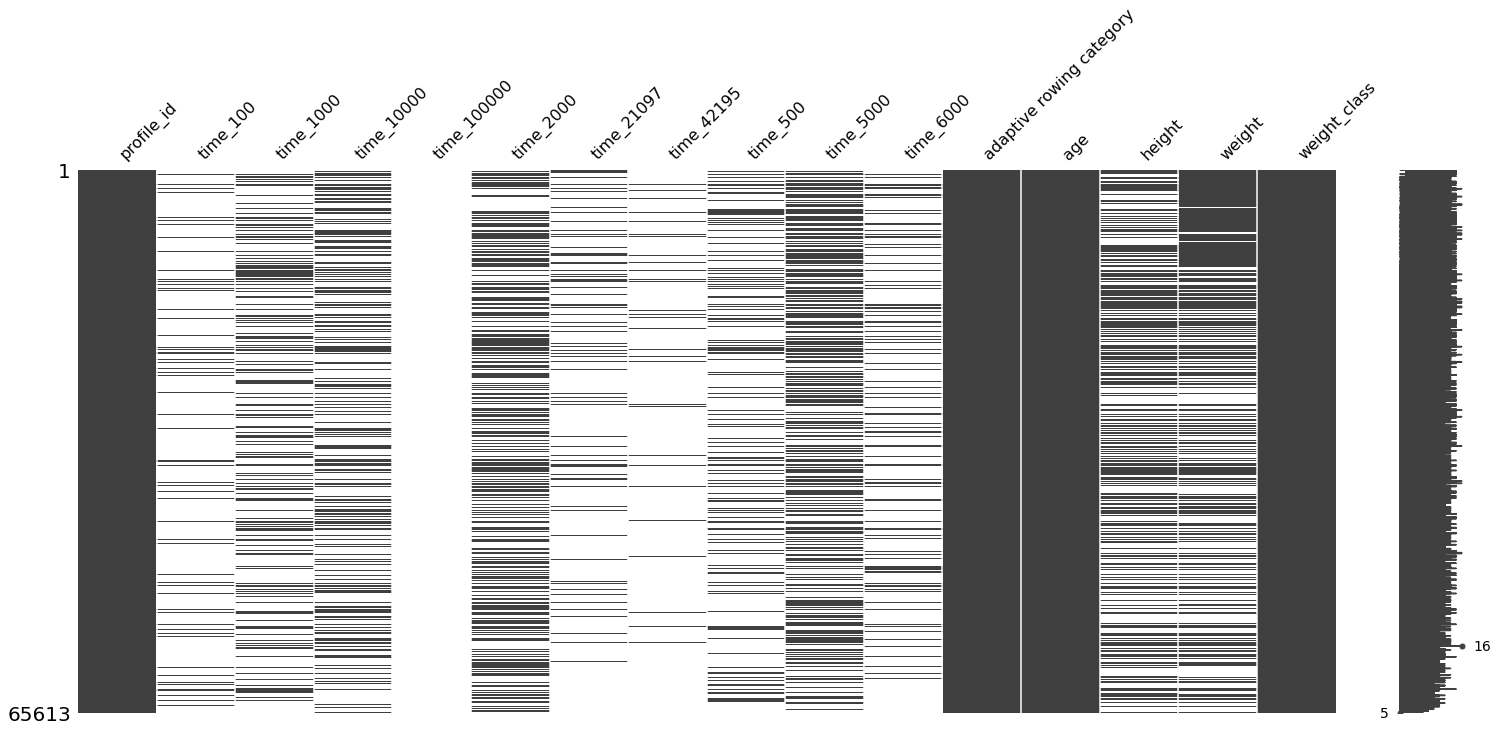

In [60]:
msno.matrix(df_athletes_workouts)

<AxesSubplot:>

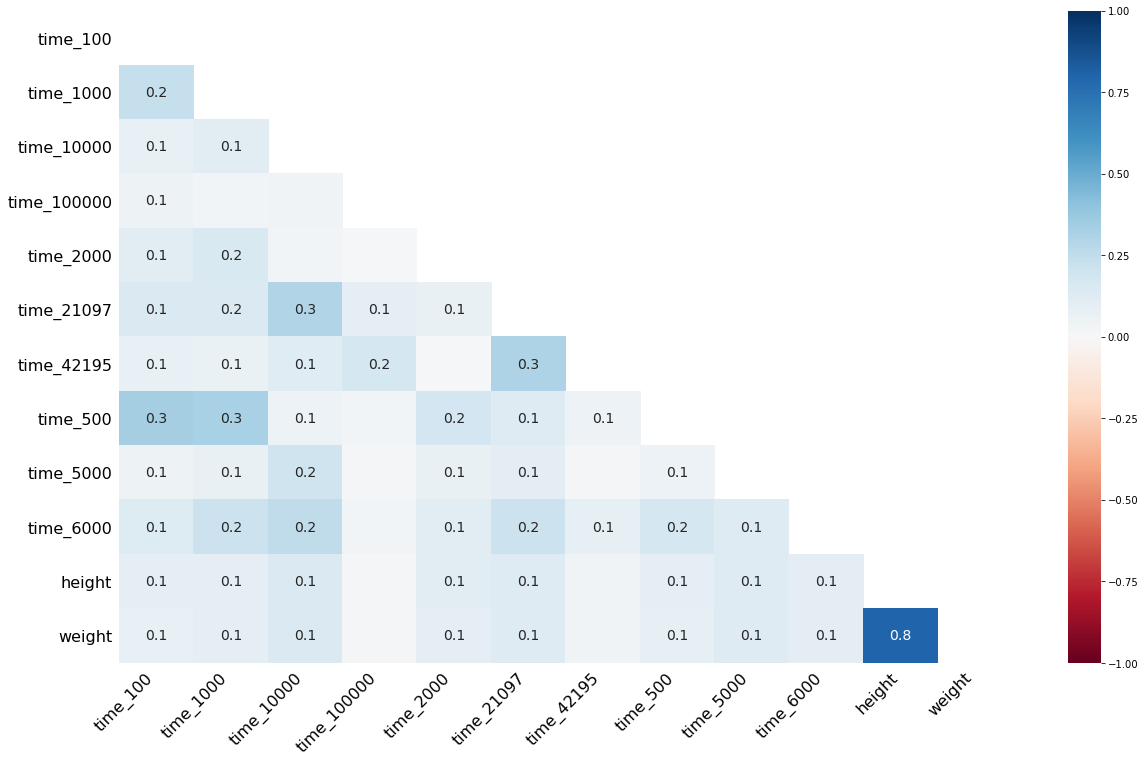

In [61]:
msno.heatmap(df_athletes_workouts)

Now choose a subset of rows where we have complete data

In [62]:
percent_complete(df_athletes_workouts)

profile_id                  100.000000
time_100                     11.700425
time_1000                    29.164952
time_10000                   37.154222
time_100000                   0.338348
time_2000                    50.688126
time_21097                   15.355189
time_42195                    5.232195
time_500                     25.042293
time_5000                    52.527700
time_6000                    17.839453
adaptive rowing category    100.000000
age                         100.000000
height                       50.602777
weight                       55.888315
weight_class                100.000000
dtype: float64


In [63]:
def filter_workouts(df, filter_cols, const_cols):
    for col in filter_cols:
        df = df[df[col].notnull()]
    return df[filter_cols + const_cols]

const_cols = ["adaptive rowing category","age", "height", "weight", "weight_class", "profile_id"]


### 5k and 2k

In [64]:
filter_cols = ["time_5000","time_2000"]
filter_workouts(df_athletes_workouts, filter_cols, const_cols)

time_5000  time_2000 adaptive rowing category  age  height  weight  \
4         1086.8      416.4                     able   56   188.0    97.1   
6         1204.7      474.1                     able   67     NaN    86.2   
9         1178.8      458.9                     able   70     NaN    90.7   
11        1075.6      388.7                     able   48   185.4    93.0   
15        1352.8      540.4                     able   61     NaN    64.0   
...          ...        ...                      ...  ...     ...     ...   
65515     1595.8      550.0                     able   33     NaN     NaN   
65527     1145.4      445.3                     able   44   193.0    89.8   
65548     1053.4      401.9                     able   41     NaN     NaN   
65591     1479.3      519.3                     able   28     NaN     NaN   
65595     1438.7      580.1                     able   41   180.3    83.9   

      weight_class  profile_id  
4                H          83  
6                H          88  
9                H         122  
11               H         177  
15               H         344  
...            ...         ...  
65515            H     1470768  
65527            H     1470980  
65548            H     1471373  
65591            H     1472089  
65595            H     1472194  

[18700 rows x 8 columns]

### 5k, 2k, and 10k

In [65]:
filter_cols = ["time_5000","time_2000","time_10000"]
df_5_2_10 = filter_workouts(df_athletes_workouts, filter_cols, const_cols)
df_5_2_10

time_5000  time_2000  time_10000 adaptive rowing category  age  height  \
4         1086.8      416.4      2222.6                     able   56   188.0   
6         1204.7      474.1      2512.3                     able   67     NaN   
9         1178.8      458.9      2451.1                     able   70     NaN   
11        1075.6      388.7      2221.0                     able   48   185.4   
16        1187.4      468.0      2450.6                     able   52     NaN   
...          ...        ...         ...                      ...  ...     ...   
65299     1364.3      505.0      2828.1                     able   58   162.6   
65330     1215.6      458.9      2531.2                     able   45   182.9   
65486     1614.7      710.7      3078.0                     able   50   185.4   
65502     1292.7      484.1      2777.9                     able   47     NaN   
65515     1595.8      550.0      3495.0                     able   33     NaN   

       weight weight_class  profile_id  
4        97.1            H          83  
6        86.2            H          88  
9        90.7            H         122  
11       93.0            H         177  
16       81.6            H         347  
...       ...          ...         ...  
65299    59.0            L     1467928  
65330    92.5            H     1468172  
65486    85.3            H     1470248  
65502     NaN            H     1470561  
65515     NaN            H     1470768  

[10730 rows x 9 columns]

### 5k, 2k, and 1k

In [66]:
filter_cols = ["time_5000","time_2000","time_10000"]
filter_workouts(df_athletes_workouts, filter_cols, const_cols)

time_5000  time_2000  time_10000 adaptive rowing category  age  height  \
4         1086.8      416.4      2222.6                     able   56   188.0   
6         1204.7      474.1      2512.3                     able   67     NaN   
9         1178.8      458.9      2451.1                     able   70     NaN   
11        1075.6      388.7      2221.0                     able   48   185.4   
16        1187.4      468.0      2450.6                     able   52     NaN   
...          ...        ...         ...                      ...  ...     ...   
65299     1364.3      505.0      2828.1                     able   58   162.6   
65330     1215.6      458.9      2531.2                     able   45   182.9   
65486     1614.7      710.7      3078.0                     able   50   185.4   
65502     1292.7      484.1      2777.9                     able   47     NaN   
65515     1595.8      550.0      3495.0                     able   33     NaN   

       weight weight_class  profile_id  
4        97.1            H          83  
6        86.2            H          88  
9        90.7            H         122  
11       93.0            H         177  
16       81.6            H         347  
...       ...          ...         ...  
65299    59.0            L     1467928  
65330    92.5            H     1468172  
65486    85.3            H     1470248  
65502     NaN            H     1470561  
65515     NaN            H     1470768  

[10730 rows x 9 columns]

### 5k, 2k, 10k, and 1k

In [67]:
filter_cols = ["time_5000","time_2000","time_10000","time_1000"]
filter_workouts(df_athletes_workouts, filter_cols, const_cols)

time_5000  time_2000  time_10000  time_1000 adaptive rowing category  \
4         1086.8      416.4      2222.6      203.9                     able   
6         1204.7      474.1      2512.3      236.3                     able   
11        1075.6      388.7      2221.0      190.1                     able   
16        1187.4      468.0      2450.6      238.9                     able   
17        1006.9      387.3      2051.8      187.9                     able   
...          ...        ...         ...        ...                      ...   
64725     1456.7      555.2      3233.6      258.3                     able   
64798     1190.6      454.4      2465.7      219.1                     able   
64816     1289.7      479.8      2710.8      234.7                     able   
65125     1164.4      450.6      2711.6      199.0                     able   
65209     1292.7      491.4      2677.3      233.1                     able   

       age  height  weight weight_class  profile_id  
4       56   188.0    97.1            H          83  
6       67     NaN    86.2            H          88  
11      48   185.4    93.0            H         177  
16      52     NaN    81.6            H         347  
17      45   185.4    73.9            L         389  
...    ...     ...     ...          ...         ...  
64725   52   162.6    49.9            L     1462223  
64798   31     NaN     NaN            L     1462916  
64816   68   185.4    83.9            H     1463139  
65125   44   193.0    99.8            H     1465969  
65209   46     NaN     NaN            H     1466915  

[6045 rows x 10 columns]

Let's choose 5k,10k and 2k to move forward with

In [68]:
df_5_2_10

time_5000  time_2000  time_10000 adaptive rowing category  age  height  \
4         1086.8      416.4      2222.6                     able   56   188.0   
6         1204.7      474.1      2512.3                     able   67     NaN   
9         1178.8      458.9      2451.1                     able   70     NaN   
11        1075.6      388.7      2221.0                     able   48   185.4   
16        1187.4      468.0      2450.6                     able   52     NaN   
...          ...        ...         ...                      ...  ...     ...   
65299     1364.3      505.0      2828.1                     able   58   162.6   
65330     1215.6      458.9      2531.2                     able   45   182.9   
65486     1614.7      710.7      3078.0                     able   50   185.4   
65502     1292.7      484.1      2777.9                     able   47     NaN   
65515     1595.8      550.0      3495.0                     able   33     NaN   

       weight weight_class  profile_id  
4        97.1            H          83  
6        86.2            H          88  
9        90.7            H         122  
11       93.0            H         177  
16       81.6            H         347  
...       ...          ...         ...  
65299    59.0            L     1467928  
65330    92.5            H     1468172  
65486    85.3            H     1470248  
65502     NaN            H     1470561  
65515     NaN            H     1470768  

[10730 rows x 9 columns]

<AxesSubplot:>

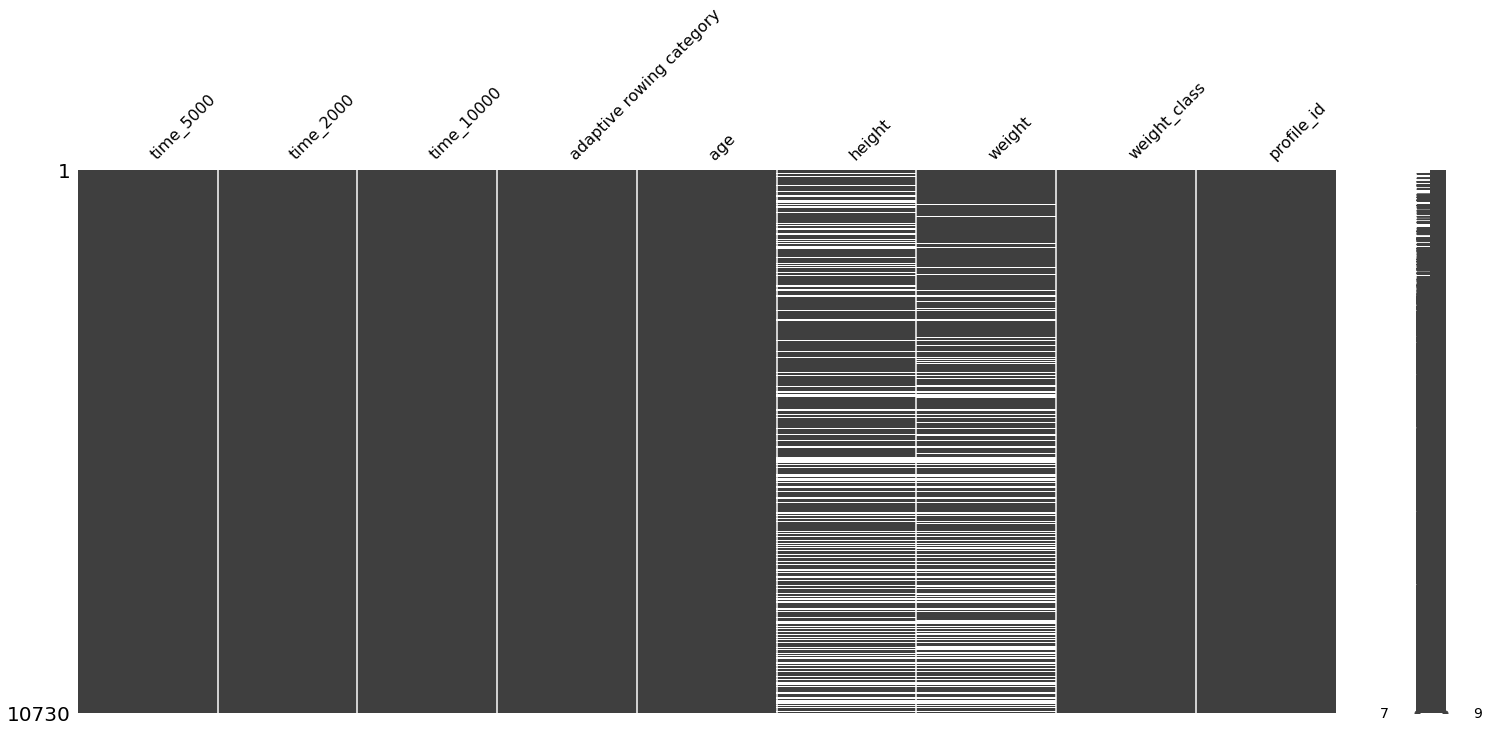

In [69]:
msno.matrix(df_5_2_10)

In [70]:
percent_complete(df_5_2_10)

time_5000                   100.000000
time_2000                   100.000000
time_10000                  100.000000
adaptive rowing category    100.000000
age                         100.000000
height                       69.319664
weight                       73.513514
weight_class                100.000000
profile_id                  100.000000
dtype: float64


In [71]:
df_5_2_10.describe()

time_5000     time_2000    time_10000           age       height  \
count  10730.000000  10730.000000  10730.000000  10730.000000  7438.000000   
mean    1250.252032    475.016887   2611.348043     47.085834   181.004020   
std      147.353375     59.780015    322.162208     11.975174     8.736443   
min      959.400000    357.300000   1922.000000      6.000000   124.500000   
25%     1151.000000    435.000000   2385.600000     39.000000   175.300000   
50%     1220.700000    465.100000   2548.450000     47.000000   180.300000   
75%     1318.900000    503.175000   2756.900000     55.000000   188.000000   
max     3449.600000   1215.500000   5552.500000     92.000000   259.100000   

           weight    profile_id  
count  7888.00000  1.073000e+04  
mean     86.23021  1.134372e+06  
std      15.87416  3.129407e+05  
min       0.50000  8.300000e+01  
25%      74.80000  1.089919e+06  
50%      85.30000  1.222127e+06  
75%      95.30000  1.320238e+06  
max     225.00000  1.470768e+06

Still missing height and weight data.

Choices:
    1. Drop rows missing height or weight
    2. Drop weight column, use just weight class. Then impute or drop height.
    3. Impute height and weight

Go with simples option: drop rows missing height or weight.

In [77]:
df_5_2_10 = df_5_2_10[df_5_2_10["height"]].notnull()
df_5_2_10 = df_5_2_10[df_5_2_10["weight"]].notnull()

KeyError: "None of [Float64Index([188.0, 185.4, 185.4, 172.7, 172.7, 157.5, 172.7, 180.3, 177.8,\n              180.3,\n              ...\n              185.4, 195.6, 177.8, 188.0, 190.5, 193.0, 165.1, 162.6, 182.9,\n              185.4],\n             dtype='float64', length=7133)] are in the [columns]"

In [78]:
percent_complete(df_5_2_10)

time_5000                   100.0
time_2000                   100.0
time_10000                  100.0
adaptive rowing category    100.0
age                         100.0
height                      100.0
weight                      100.0
weight_class                100.0
profile_id                  100.0
dtype: float64


In [79]:
df_5_2_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7133 entries, 4 to 65486
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   time_5000                 7133 non-null   float64 
 1   time_2000                 7133 non-null   float64 
 2   time_10000                7133 non-null   float64 
 3   adaptive rowing category  7133 non-null   category
 4   age                       7133 non-null   int64   
 5   height                    7133 non-null   float64 
 6   weight                    7133 non-null   float64 
 7   weight_class              7133 non-null   category
 8   profile_id                7133 non-null   int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 460.5 KB


In [80]:
df_5_2_10.to_csv("analysis/5_2_10.csv")

KeyError: "['profile_id'] not found in axis"